In [3]:
import pandas as pd

In [1]:
!mv /Users/kcarnold/Downloads/hmda_2017_nationwide_first-lien-owner-occupied-1-4-family-records_labels.zip .

In [4]:
data = pd.read_csv('hmda_2017_nationwide_first-lien-owner-occupied-1-4-family-records_labels.zip')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
del data

In [19]:
data = pd.read_csv("https://files.consumerfinance.gov/hmda-historic-loan-data/hmda_2017_mi_all-records_labels.zip")

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (34,36,38,44,46,48,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437181 entries, 0 to 437180
Data columns (total 78 columns):
as_of_year                        437181 non-null int64
respondent_id                     437181 non-null object
agency_name                       437181 non-null object
agency_abbr                       437181 non-null object
agency_code                       437181 non-null int64
loan_type_name                    437181 non-null object
loan_type                         437181 non-null int64
property_type_name                437181 non-null object
property_type                     437181 non-null int64
loan_purpose_name                 437181 non-null object
loan_purpose                      437181 non-null int64
owner_occupancy_name              437181 non-null object
owner_occupancy                   437181 non-null int64
loan_amount_000s                  437181 non-null int64
preapproval_name                  437181 non-null object
preapproval                       437181 

In [21]:
data['action_taken_name'].value_counts()

Loan originated                                        241945
Application denied by financial institution             65175
Loan purchased by the institution                       50977
Application withdrawn by applicant                      46782
File closed for incompleteness                          20168
Application approved but not accepted                   12102
Preapproval request denied by financial institution        26
Preapproval request approved but not accepted               6
Name: action_taken_name, dtype: int64

In [28]:
subset = data[data.action_taken.isin([1, 3])].copy()
print(len(subset))
subset.action_taken_name.value_counts()

307120


Loan originated                                241945
Application denied by financial institution     65175
Name: action_taken_name, dtype: int64

In [31]:
subset['approved'] = data['action_taken'] == 1 
subset['approved'].value_counts()

True     241945
False     65175
Name: approved, dtype: int64

In [32]:
import seaborn as sns

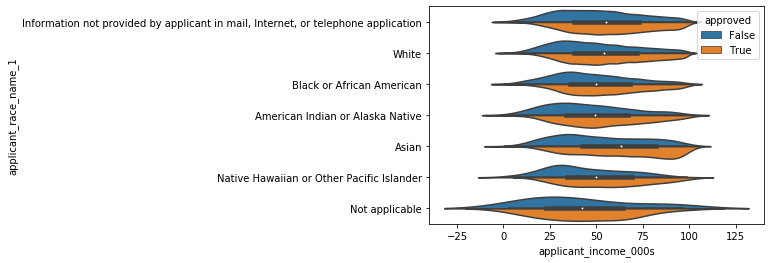

In [41]:
sns.violinplot(y="applicant_race_name_1", hue='approved', split=True, x='applicant_income_000s', data=subset.query('applicant_income_000s < 1e2'))

In [6]:
data.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,0000068601,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,4272.0,2.790000,55800.0,99.970001,1609.0,2271.0,NaN
1,2017,0000063194,National Credit Union Administration,NCUA,5,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,5451.0,10.790000,56800.0,128.639999,1601.0,1814.0,NaN
2,2017,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,3372.0,33.189999,97400.0,141.740005,592.0,1105.0,NaN
3,2017,41-1842999,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,12551.0,6.490000,89800.0,135.779999,3463.0,3782.0,NaN
4,2017,0000613307,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,3755.0,62.639999,73700.0,132.720001,623.0,742.0,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986659 entries, 0 to 5986658
Data columns (total 78 columns):
as_of_year                        int64
respondent_id                     object
agency_name                       object
agency_abbr                       object
agency_code                       int64
loan_type_name                    object
loan_type                         int64
property_type_name                object
property_type                     int64
loan_purpose_name                 object
loan_purpose                      int64
owner_occupancy_name              object
owner_occupancy                   int64
loan_amount_000s                  float64
preapproval_name                  object
preapproval                       int64
action_taken_name                 object
action_taken                      int64
msamd_name                        object
msamd                             float64
state_name                        object
state_abbr                      

In [11]:
%matplotlib inline

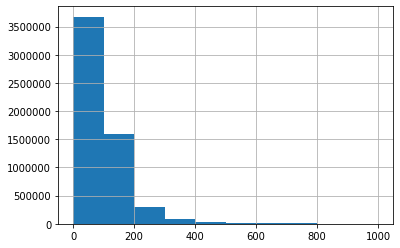

In [15]:
data['applicant_income_000s'][data.applicant_income_000s < 1e3].hist()

In [17]:
data['action_taken_name'].value_counts()

Loan originated    5986659
Name: action_taken_name, dtype: int64

In [7]:
data['agency_name'].value_counts()

Department of Housing and Urban Development    3264512
Consumer Financial Protection Bureau           1342897
Federal Deposit Insurance Corporation           548904
National Credit Union Administration            413911
Office of the Comptroller of the Currency       223485
Federal Reserve System                          192950
Name: agency_name, dtype: int64

In [8]:
for 
data['agency_name'].astype('category')

0                 National Credit Union Administration
1                 National Credit Union Administration
2                 Consumer Financial Protection Bureau
3          Department of Housing and Urban Development
4                 Consumer Financial Protection Bureau
5                 Consumer Financial Protection Bureau
6                Federal Deposit Insurance Corporation
7          Department of Housing and Urban Development
8                 National Credit Union Administration
9                 Consumer Financial Protection Bureau
10                National Credit Union Administration
11         Department of Housing and Urban Development
12         Department of Housing and Urban Development
13                Consumer Financial Protection Bureau
14         Department of Housing and Urban Development
15                Consumer Financial Protection Bureau
16         Department of Housing and Urban Development
17         Department of Housing and Urban Development
18        